In [7]:
!pip install --upgrade certifi

  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


In [1]:
!pip install torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [3]:
os.makedirs('../.cache', exist_ok=True)

In [10]:
import ssl

# SSL 인증서 무시 설정
ssl._create_default_https_context = ssl._create_unverified_context

training_data = datasets.CIFAR10(
    root='../.cache',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root='../.cache',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:16<00:00, 10518900.53it/s]


Extracting ../.cache/cifar-10-python.tar.gz to ../.cache
Files already downloaded and verified


In [11]:
labels_map = {
    0: "plane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

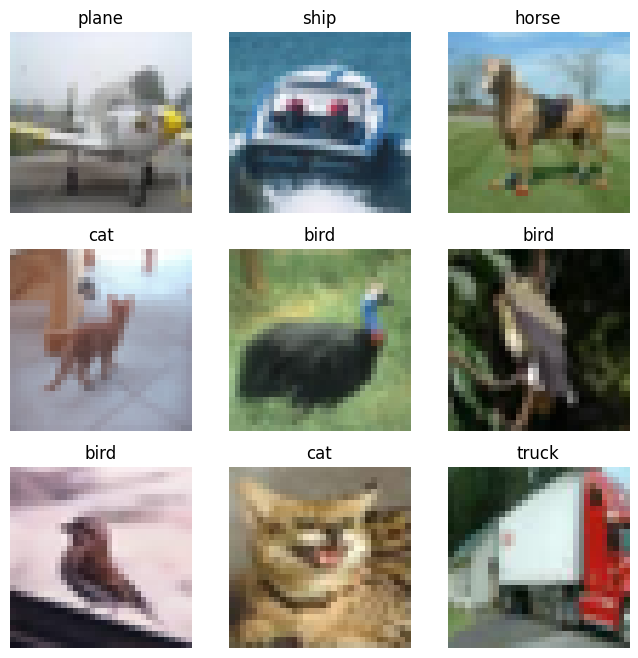

In [15]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    
    plt.title(labels_map[label])
    
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))
    
plt.show()

In [16]:
from PIL import Image

In [18]:
img = Image.open('./sample_images/cat_img.jpeg')

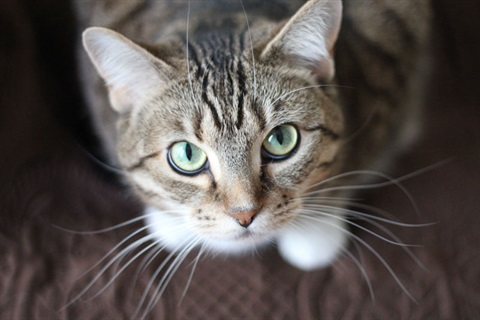

In [19]:
img

In [20]:
img.size

(480, 320)

In [21]:
np_img = np.array(img)

In [22]:
np_img.shape

(320, 480, 3)

In [23]:
np_img.dtype

dtype('uint8')

In [25]:
for each_channel in range(3):
    print(f"{each_channel}-th min value: ", np.min(np_img[:,:,each_channel]))
    print(f"{each_channel}-th max value: ", np.max(np_img[:,:,each_channel]))

0-th min value:  0
0-th max value:  255
1-th min value:  3
1-th max value:  255
2-th min value:  1
2-th max value:  255


In [26]:
tensor_img = ToTensor()(img)

In [27]:
tensor_img.shape

torch.Size([3, 320, 480])

In [28]:
for each_channel in range(3):
    print(f"{each_channel}-th min value: ", torch.min(tensor_img[each_channel,:,:]))
    print(f"{each_channel}-th max value: ", torch.max(tensor_img[each_channel,:,:]))

0-th min value:  tensor(0.)
0-th max value:  tensor(1.)
1-th min value:  tensor(0.0118)
1-th max value:  tensor(1.)
2-th min value:  tensor(0.0039)
2-th max value:  tensor(1.)


In [30]:
tensor_img2 = ToTensor()(np_img)

In [31]:
tensor_img2.shape

torch.Size([3, 320, 480])

In [32]:
 for each_channel in range(3):
    print(f"{each_channel}-th min value: ", torch.min(tensor_img2[each_channel,:,:]))
    print(f"{each_channel}-th max value: ", torch.max(tensor_img2[each_channel,:,:]))

0-th min value:  tensor(0.)
0-th max value:  tensor(1.)
1-th min value:  tensor(0.0118)
1-th max value:  tensor(1.)
2-th min value:  tensor(0.0039)
2-th max value:  tensor(1.)


In [33]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [34]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


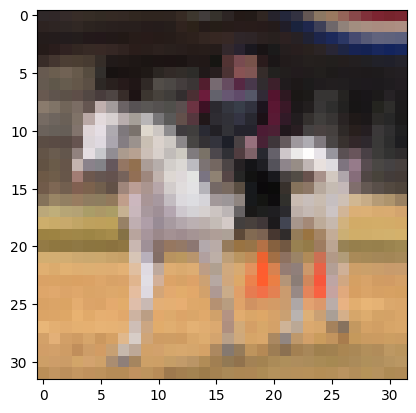

Label: 7


In [35]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {label}")

In [36]:
iterator = iter([0, 1, 2, 3, 4])

In [37]:
next(iterator)

0

In [38]:
next(iterator)

1